In [1]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.metrics import structural_similarity as ssim

np.set_printoptions(precision=2, suppress=True)

In [2]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [3]:
def mae(imageA, imageB):
    err = np.sum(np.abs((imageA.astype("float") - imageB.astype("float"))))
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [4]:
def psnr(mse):
    if mse == 0:
        return 100
    PIXEL_MAX = 255
    return 20*math.log10(PIXEL_MAX/math.sqrt(mse))

In [18]:
exp_name = ['exp1','exp2','exp4','exp5']

In [19]:
GT_json_path = []
for i in exp_name:
    GT_json_path.append(f'{i}_transforms_test.json')

In [20]:
GT_path_array = []
for i in GT_json_path:
    with open('./'+i) as json_file:
        json_data = json.load(json_file)
    GT_path_list = []
    for i in range(len(json_data['frames'])):
        GT_path_list.append(json_data['frames'][i]['file_path'])
    GT_path_array.append(GT_path_list)

In [21]:
GT_list_arr = []
for arr in GT_path_array:
    GT_list = []
    for i in arr:
        GT_list.append(cv2.imread(i+'_depth_0033.png', cv2.IMREAD_GRAYSCALE))
    GT_list_arr.append(GT_list)
print(f'GT len : {len(GT_list_arr)}')

GT len : 4


In [22]:
result_path_arr = []
for i in exp_name:
    result_path = './' + i
    result_path_list = os.listdir(result_path)
    result_path_list.sort()
    result_path_arr.append(result_path_list)    

In [23]:
result_list_arr = []
for j, path in enumerate(result_path_arr):
    result_list = []
    for i in path:
        result_list.append(cv2.imread(exp_name[j]+'/'+i, cv2.IMREAD_GRAYSCALE))
    result_list_arr.append(result_list)

In [12]:
GT_list_arr = np.array(GT_list_arr)
GT_list_arr = 255 - GT_list_arr
GT_list_arr = (GT_list_arr/255)*9
result_list_arr = np.array(result_list_arr)
result_list_arr =  255 - result_list_arr
result_list_arr = (result_list_arr/255)*9

In [13]:
mean_mse_arr = []
mean_mae_arr = []
mean_rmse_arr = []
mean_psnr_arr = []
mean_ssim_arr = []

for j in range(len(exp_name)):
    mse_list = []
    mae_list = []
    rmse_list = []
    ssim_list = []
    psnr_list = []
    for i in range(len(GT_list_arr)):
        mse_temp = mse(GT_list_arr[j][i], result_list_arr[j][i])
        mse_list.append(mse_temp)
        mae_list.append(mae(GT_list_arr[j][i], result_list_arr[j][i]))
        rmse_list.append(np.sqrt(mse_temp))
        psnr_list.append(psnr(mse_temp))
        ssim_list.append(ssim(GT_list_arr[j][i], result_list_arr[j][i]))
    mean_mse = np.mean(mse_list)
    mean_mae = np.mean(mae_list)
    mean_rmse = np.mean(rmse_list)
    mean_psnr = np.mean(psnr_list)
    mean_ssim = np.mean(ssim_list)
    
    mean_mse_arr.append(mean_mse)
    mean_mae_arr.append(mean_mae)
    mean_rmse_arr.append(mean_rmse)
    mean_psnr_arr.append(mean_psnr)
    mean_ssim_arr.append(mean_ssim)

In [15]:
mean_mse_arr = np.array(mean_mse_arr)
mean_mae_arr = np.array(mean_mae_arr)
mean_rmse_arr = np.array(mean_rmse_arr)
mean_psnr_arr = np.array(mean_psnr_arr)
mean_ssim_arr = np.array(mean_ssim_arr)
import pandas as pd
col = ['mse', 'mae', 'rmse', 'psnr', 'ssim']
ind = [1,2,4,5]
con = np.c_[mean_mse_arr, mean_mae_arr, mean_rmse_arr, mean_psnr_arr, mean_ssim_arr]
pd.DataFrame(con, columns=col, index=ind)

,mse,mae,rmse,psnr,ssim
1,4.343126,2.052236,2.084010,41.752839,0.907857
2,4.170279,2.006027,2.042113,41.929268,0.918218
4,4.847704,2.165530,2.201738,41.275542,0.892109
5,5.218250,2.252198,2.284322,40.955757,0.882715


In [16]:
def plotImage(y, image_list, step):
    for i in range(5):
        axes[y,i+1].imshow(image_list[20*(step)+4*i], cmap = 'gray')
        axes[y,i+1].axis("off")

(0.0, 1.0, 0.0, 1.0)

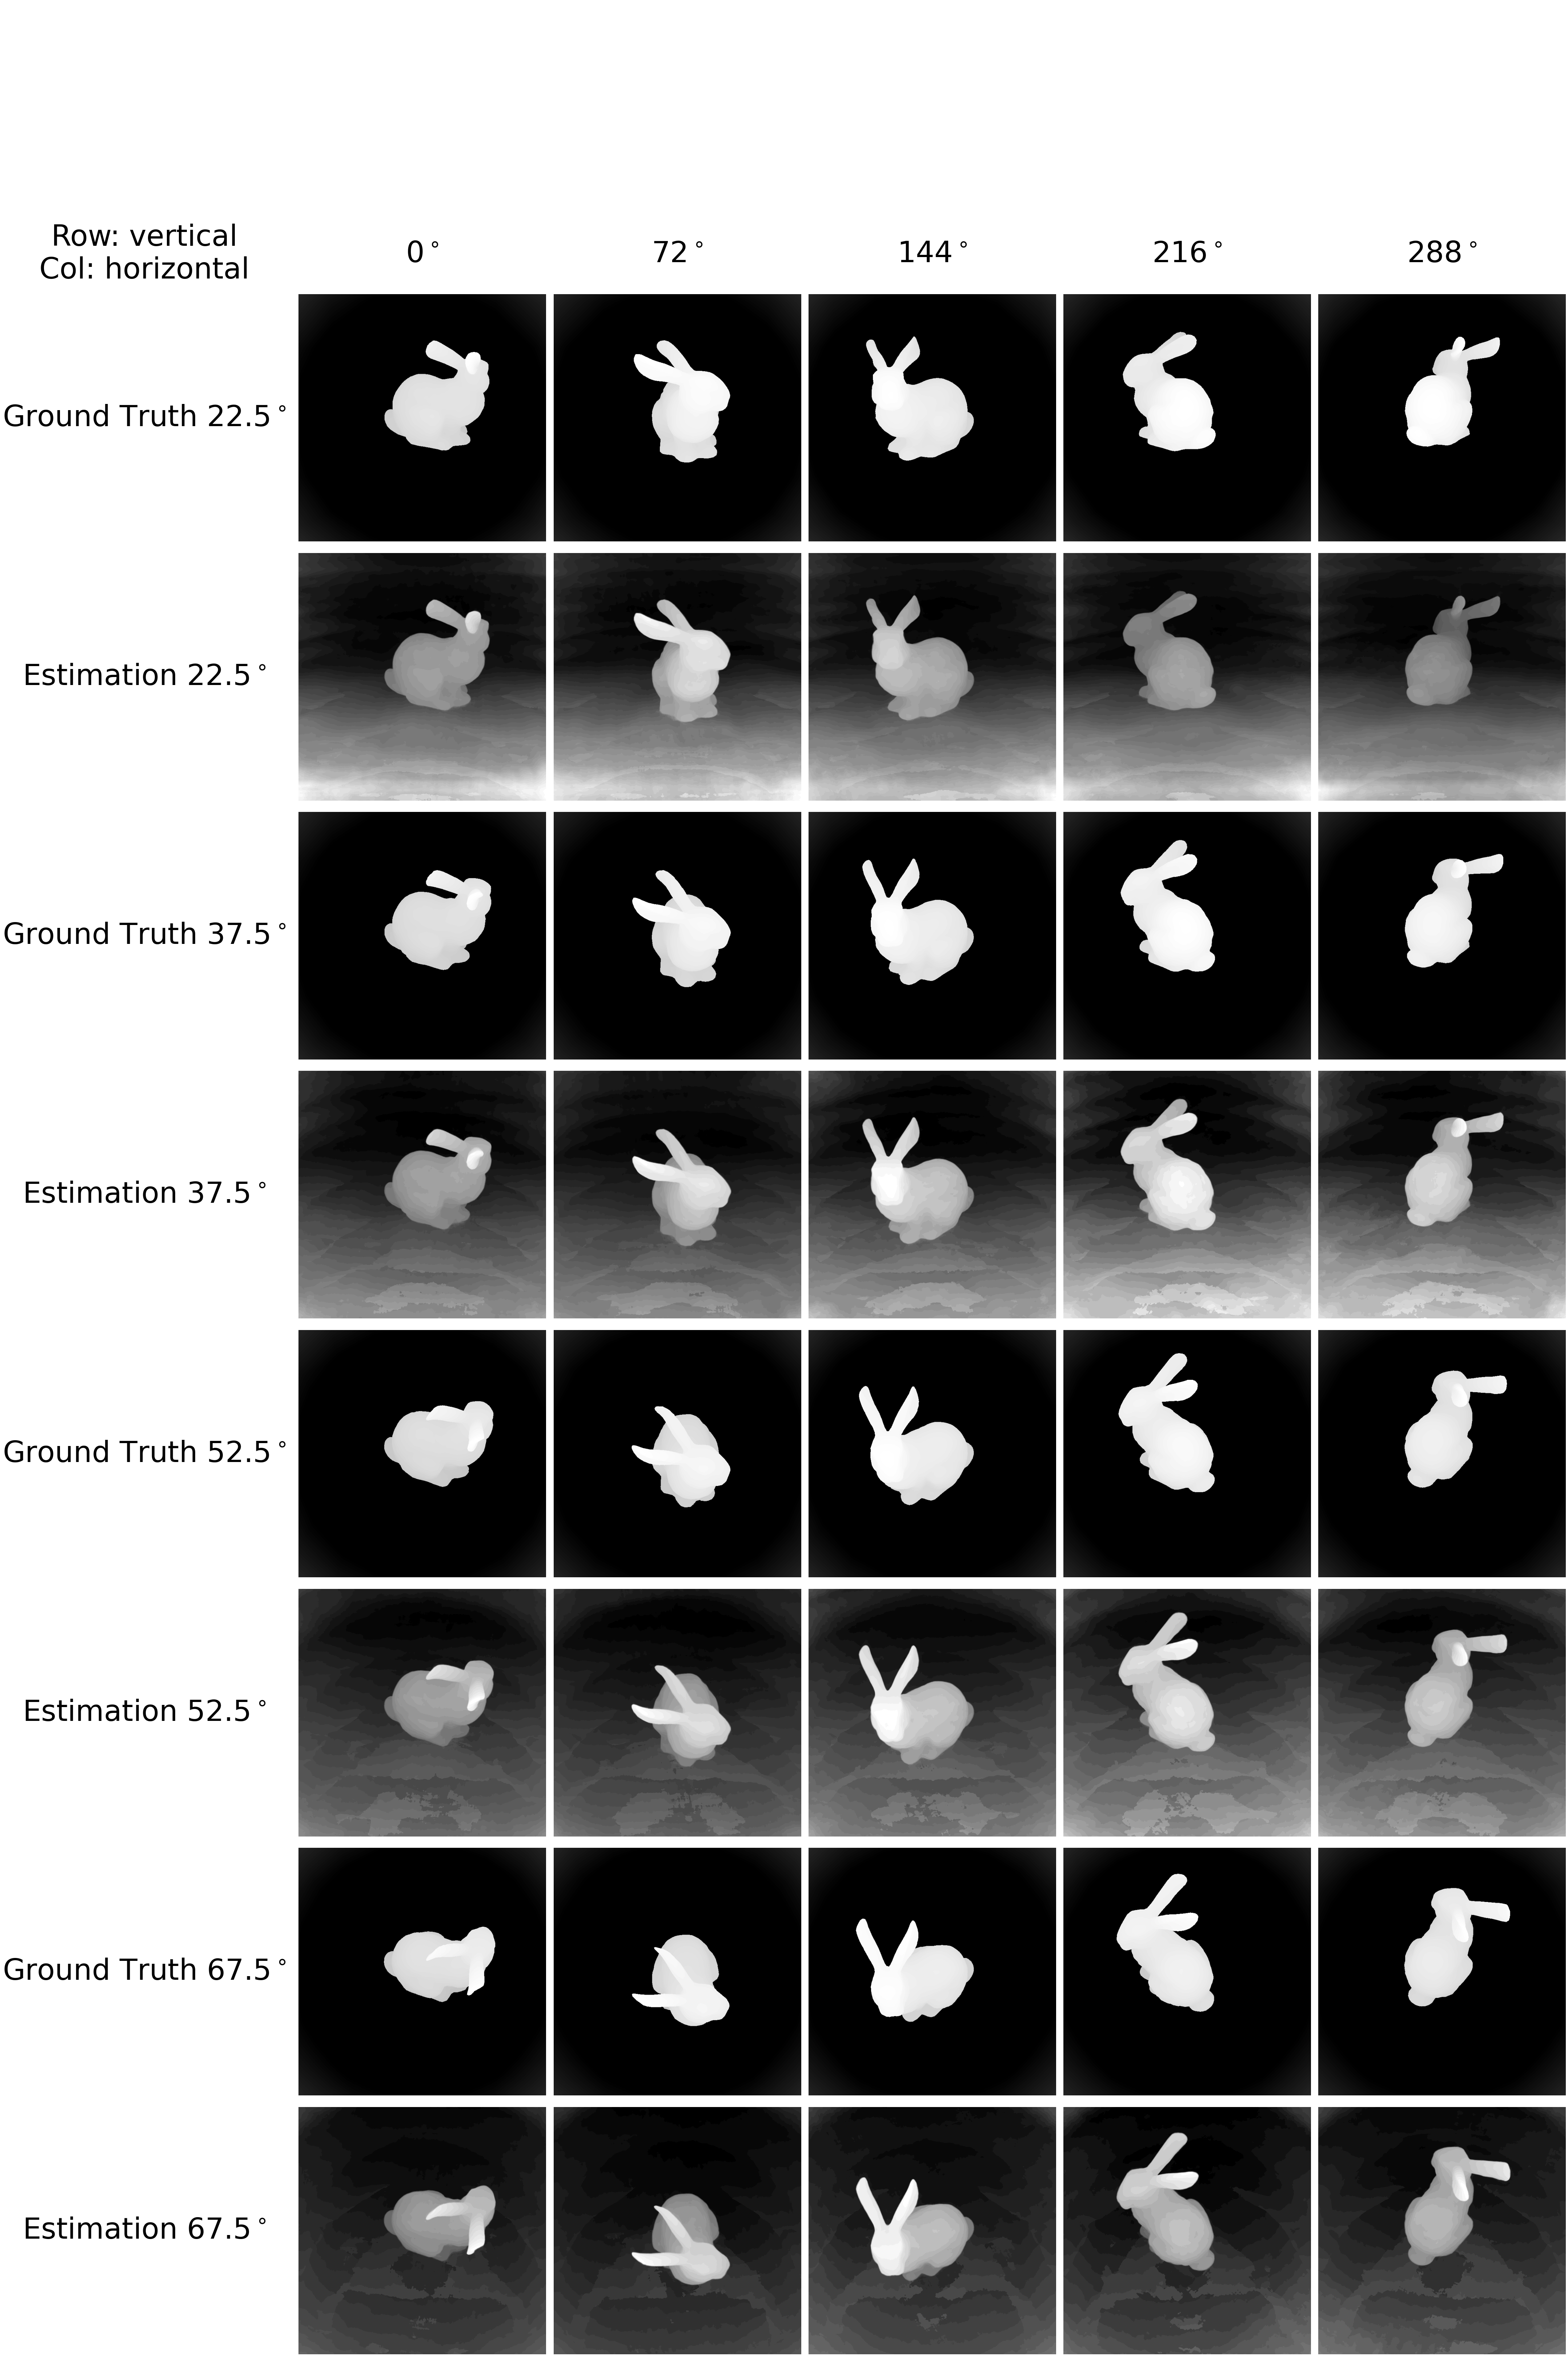

In [24]:
figure, axes = plt.subplots(9,6, figsize=(60, 90),constrained_layout = True)

k = 0

plotImage(1,GT_list_arr[k],0)
plotImage(2,result_list_arr[k],0)

plotImage(3,GT_list_arr[k],1)
plotImage(4,result_list_arr[k],1)

plotImage(5,GT_list_arr[k],2)
plotImage(6,result_list_arr[k],2)

plotImage(7,GT_list_arr[k],3)
plotImage(8,result_list_arr[k],3)

axes[0,0].text(0.5,0,'Row: vertical\nCol: horizontal', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[0,0].axis("off")
axes[0,1].text(0.5,0,'0$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[0,1].axis("off")
axes[0,2].text(0.5,0,'72$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[0,2].axis("off")
axes[0,3].text(0.5,0,'144$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[0,3].axis("off")
axes[0,4].text(0.5,0,'216$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[0,4].axis("off")
axes[0,5].text(0.5,0,'288$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[0,5].axis("off")

axes[1,0].text(0.5,0.5,'Ground Truth 22.5$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[1,0].axis("off")
axes[2,0].text(0.5,0.5,'Estimation 22.5$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[2,0].axis("off")

axes[3,0].text(0.5,0.5,'Ground Truth 37.5$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[3,0].axis("off")
axes[4,0].text(0.5,0.5,'Estimation 37.5$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[4,0].axis("off")

axes[5,0].text(0.5,0.5,'Ground Truth 52.5$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[5,0].axis("off")
axes[6,0].text(0.5,0.5,'Estimation 52.5$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[6,0].axis("off")

axes[7,0].text(0.5,0.5,'Ground Truth 67.5$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[7,0].axis("off")
axes[8,0].text(0.5,0.5,'Estimation 67.5$^\circ$', horizontalalignment='center', verticalalignment='center', fontsize=80)
axes[8,0].axis("off")